In [4]:
import json
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# UFO JSON 파일 불러오기
with open('/data/ephemeral/home/data/chinese_receipt/ufo/train.json', 'r', encoding='utf-8') as f:
    data = json.load(f)


In [25]:
def image_visualization() :
    image_key =  random.choice(list(data['images'].keys()))
    image_data = data['images'][image_key]
    img_path = f"/data/ephemeral/home/data/chinese_receipt/img/train/{image_key}"  # 실제 이미지 경로로 업데이트
    img = cv2.imread(img_path)
    plt.figure(figsize=(20,15))
    if img is None:
        print("이미지를 불러올 수 없습니다. 경로를 확인해주세요:", img_path)
        return
    
    # 경계 상자 그리기
    for word_id, word_data in image_data['words'].items():
        points = word_data['points']
        transcription = word_data['transcription']
        
        # 그리기용 정수 좌표로 변환
        pts = np.array(points, np.int32).reshape((-1, 1, 2))
        
        # 경계 상자 폴리곤 그리기
        cv2.polylines(img, [pts], isClosed=True, color=(255,0, 0), thickness=2)
        
        
    # 이미지를 RGB로 변환 후 matplotlib으로 표시
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
    
    

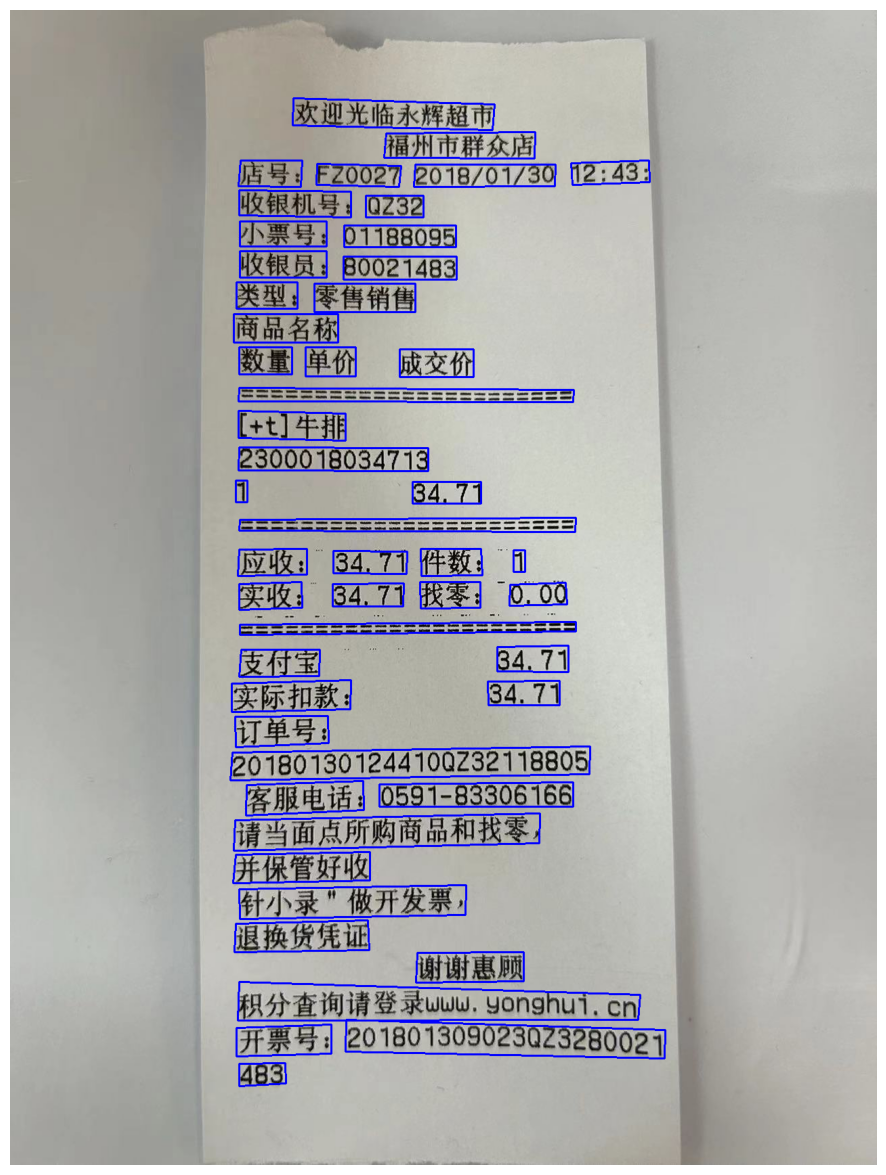

In [26]:
image_visualization()